# Проект предсказания стоимости квартиры

Ваша задача этом соревновании - предсказать цены на квартиры в датасете test.csv. Вам будут даны два датасета: train.csv (содержит признаки и цены на квартиры) и test.csv (только признаки).

## **1. Поставновка задачи**<a class='anchor' id='plan'>

**Этапы проекта:**
1. [Постановка задачи](#plan)
2. [Загрузка данных/фукции проекта](#load)
3. [Анализ зависимости целевой перемменной от столбцов](#first_analyze)
4. [Предобработка данных в PipeLine](#preprocessing)
5. [Визуализация и анализ зависимости данных от целевой переменной](#visual)
6. [Построение модели](#model)
7. [Финальная модель](#final_model)
8. [Сохранение результатов](#save_me)


Цель - предсказать стоимость квартиры 

Зачем?  

_В банках, страховых компаниях:_
- Узнать истинную стоимость имущества (залога)
- Принять решение о выдаче ипотеки/страховки
- Принять решение о % по ипотеке/страховке
  
_На площадках объявлений (Авито, Циан, ...):_
- Найти недооцененные квартиры (~ выгодные предложения), показать их пользователям
- Показывать рыночную стоимость квартиры пользователям
- Для тех, кто продает квартиру, рекомендовать цену продажи

_Для инвесторов в недвижимость:_
- Определять рыночную стоимость квартир
- Поиск недооцененных активов
- Торговля на рынке недвижимости

**2.Описание датасета**

    -Id - идентификационный номер квартиры
    -DistrictId - идентификационный номер района
    -Rooms - количество комнат
    -Square - площадь
    -LifeSquare - жилая площадь
    -KitchenSquare - площадь кухни
    -Floor - этаж
    -HouseFloor - количество этажей в доме
    -HouseYear - год постройки дома
    -Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
    -Social_1, Social_2, Social_3 - социальные показатели местности
    -Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
    -Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
    -Price - цена квартиры



## 2. Загрузка данных/функции проекта<a class='anchor' id='load'>
**Этапы проекта:**
1. [Постановка задачи](#plan)
2. [Загрузка данных/фукции проекта](#load)
3. [Анализ зависимости целевой перемменной от столбцов](#first_analyze)
4. [Предобработка данных в PipeLine](#preprocessing)
5. [Визуализация и анализ зависимости данных от целевой переменной](#visual)
6. [Построение модели](#model)
7. [Финальная модель](#final_model)
8. [Сохранение результатов](#save_me)

In [1]:
# 1.Общие
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mode
from matplotlib.patches import Rectangle
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 2. Разделение датасета
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# 3. Модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import RobustScaler

# 4. Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
%config InlineBackend.figure_format ='svg'
matplotlib.rcParams.update({'font.size': 14})  # размер шрифта на графиках

Пути до файлов.

In [2]:
TRAIN_DATASET_PATH = '/home/radmir/Study/data_libs/Data_science_project/zeroes/train.csv'
TEST_DATASET_PATH = '/home/radmir/Study/data_libs/Data_science_project/zeroes/test.csv'
PREPARED_DATASET_PATH = '/home/radmir/Study/data_libs/Data_science_project/housing_prepared.csv'
PREDICTS_FILE_PATH = '/home/radmir/Study/data_libs/Data_science_project/prediction.csv'

Считываем данные. По строкам - наблюдения, по столбцам - признаки.

Тренировочный датасэт

In [3]:
CDF = pd.read_csv(TRAIN_DATASET_PATH, sep=',') #CDF Core Data Frame
CDF.head(4)

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
0  11809          27    3.0  115.027311         NaN           10.0      4   
1   3013          22    1.0   39.832524   23.169223            8.0      7   
2   8215           1    3.0   78.342215   47.671972           10.0      2   
3   2352           1    1.0   40.409907         NaN            1.0     10   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0        10.0       2014   0.075424         B         B        11      3097   
1         8.0       1966   0.118537         B         B        30      6207   
2        17.0       1988   0.025609         B         B        33      5261   
3        22.0       1977   0.007122         B         B         1       264   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
0         0           NaN            0        0       B  305018.871089  
1         1        1183.0            1        0       B  177734.553407  
2         0         240.0            3        1       B  282078.720850  
3         0           NaN            0        1       B  168106.007630

Валидационный датасэт

In [4]:
CDF_valid = pd.read_csv(TEST_DATASET_PATH, sep=',')
CDF_valid.head(4)

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  4567          44    1.0  36.847630   19.094182            5.0      5   
1  5925          62    1.0  42.493907   42.568133           10.0      7   
2   960          27    2.0  59.463678         NaN            9.0     19   
3  3848          23    3.0  49.646030   33.893825            6.0      2   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0         9.0       1970   0.036122         B         B        24      4378   
1        17.0       2017   0.072158         B         B         2       629   
2        19.0       1977   0.211401         B         B         9      1892   
3         2.0       1965   0.014073         B         B         2       475   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
0         0        1036.0            1        1       B  
1         1           NaN            0        0       A  
2         0           NaN            0        1       B  
3         0           NaN            0        0       B

## 2.1 Функции проекта:

In [5]:
def visualize(df, column):
    """
    Функция строит график- зависимость целевой переменной от 
    переданного столбца column в дата фрейме df.
    """
    grid = sns.jointplot(df[column], CDF['Price'], kind='reg')
    grid.fig.set_figwidth(8)
    grid.fig.set_figheight(8)
    
    return plt.show()

In [6]:
def constitution(df):
    '''
    Функция строит график состояния столбцов.
    Принимает датафрейм.
    '''
    df.hist(figsize=(16,16), bins=20, grid=False);

In [7]:
def reduce_mem_usage(df):
    """ 
    Уменьшим объём памяти, который требуется для обработки датасэта.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype
    
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [8]:
def categorize(df, col: str, ncm: str, delimetr: list):
    '''
    Разбивает столбец на категории.
    
    df - датафрейм
    col - колонка, которую нужно катгоризировать
    ncm -  new name column
    delimetr - список списков, представляет ссобой промежутки, на которые
    нужно категоризировать столбец.
    '''
    category = 1
    df[ncm] = category
    
    
    for cat in delimetr:
        if (len(cat) == 1) and (cat[0] == delimetr[0][0]):
            df.loc[df[col] <= cat[0], ncm] = category
            category += 1
        elif (len(cat) == 1) and (cat[0] == delimetr[-1][0]):
            df.loc[df[col] > cat[0], ncm] = category
            category += 1
        elif (len(cat) != 1) and (cat[0] == delimetr[-1][0]): 
            df.loc[(df[col] > cat[0]) & (df[col] <= cat[1]), ncm] = category
        category += 1 
            
    return df

In [9]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

## 3. Анализ зависимости целевой перемменной от столбцов<a class='anchor' id='first_analyze'>
**Этапы проекта:**
1. [Постановка задачи](#plan)
2. [Загрузка данных/фукции проекта](#load)
3. [Анализ зависимости целевой перемменной от столбцов](#first_analyze)
4. [Предобработка данных в PipeLine](#preprocessing)
5. [Визуализация и анализ зависимости данных от целевой переменной](#visual)
6. [Построение модели](#model)
7. [Финальная модель](#final_model)
8. [Сохранение результатов](#save_me)

Посмотрим что из себя представляет датасэт.

In [10]:
CDF.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [11]:
CDF.describe()

Id    DistrictId         Rooms        Square   LifeSquare  \
count  10000.00000  10000.000000  10000.000000  10000.000000  7887.000000   
mean    8383.40770     50.400800      1.890500     56.315775    37.199645   
std     4859.01902     43.587592      0.839512     21.058732    86.241209   
min        0.00000      0.000000      0.000000      1.136859     0.370619   
25%     4169.50000     20.000000      1.000000     41.774881    22.769832   
50%     8394.50000     36.000000      2.000000     52.513310    32.781260   
75%    12592.50000     75.000000      2.000000     65.900625    45.128803   
max    16798.00000    209.000000     19.000000    641.065193  7480.592129   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   10000.000000  10000.000000  10000.000000  1.000000e+04  10000.000000   
mean        6.273300      8.526700     12.609400  3.990166e+03      0.118858   
std        28.560917      5.241148      6.775974  2.005003e+05      0.119025   
min         0.000000      1.000000      0.000000  1.910000e+03      0.000000   
25%         1.000000      4.000000      9.000000  1.974000e+03      0.017647   
50%         6.000000      7.000000     13.000000  1.977000e+03      0.075424   
75%         9.000000     12.000000     17.000000  2.001000e+03      0.195781   
max      2014.000000     42.000000    117.000000  2.005201e+07      0.521867   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  10000.000000  10000.000000  10000.000000   5202.000000  10000.000000   
mean      24.687000   5352.157400      8.039200   1142.904460      1.319500   
std       17.532614   4006.799803     23.831875   1021.517264      1.493601   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000    350.000000      0.000000   
50%       25.000000   5285.000000      2.000000    900.000000      1.000000   
75%       36.000000   7227.000000      5.000000   1548.000000      2.000000   
max       74.000000  19083.000000    141.000000   4849.000000      6.000000   

            Shops_1          Price  
count  10000.000000   10000.000000  
mean       4.231300  214138.857399  
std        4.806341   92872.293865  
min        0.000000   59174.778028  
25%        1.000000  153872.633942  
50%        3.000000  192269.644879  
75%        6.000000  249135.462171  
max       23.000000  633233.466570

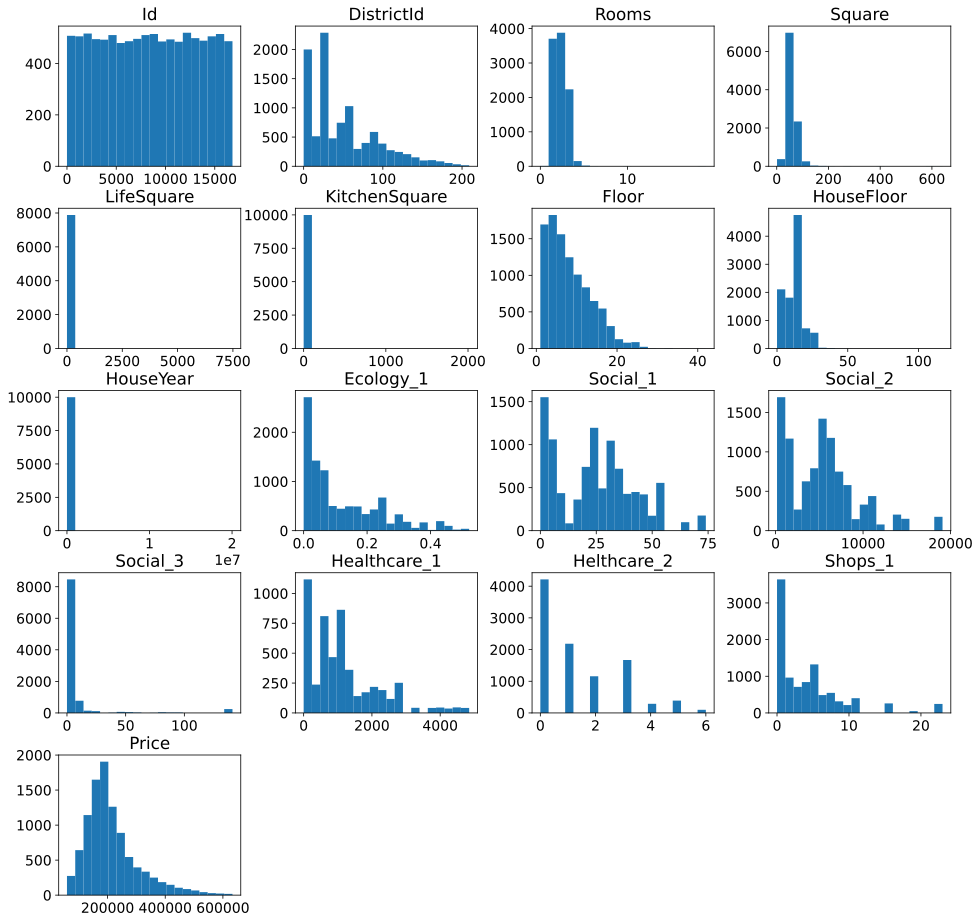

In [12]:
constitution(CDF)

Из приведенного выше можно сделать первоначальный вывод о том, что из чебя представляют данные. Например о выбросах, которые есть, например в количестве комнат, площади жилой площади, площади кухни, этаже здания. Так же можно сделать вывод о распределении значений.

Смотрим как каждый столбец сказывается на целевой переменной, т.е. как от них зависит целевая переменная- цена, чтобы выдвинуть гипотезы и предположения. Так же наглядно видим выбросы. Меняя столбец на графиках, посмотрим на данные.

In [13]:
CDF.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price']

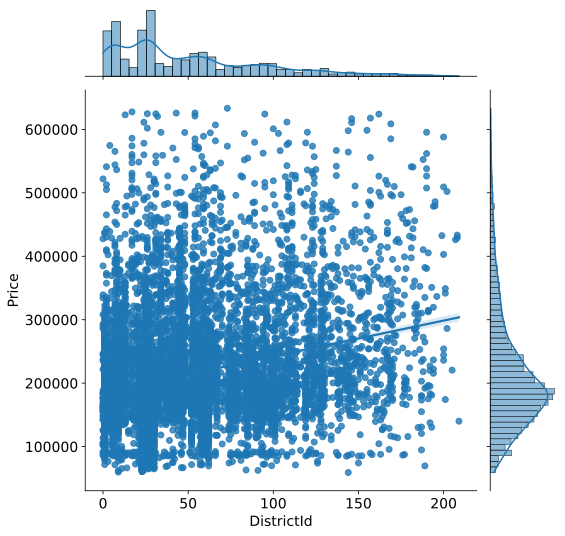

In [14]:
visualize(CDF, 'DistrictId')

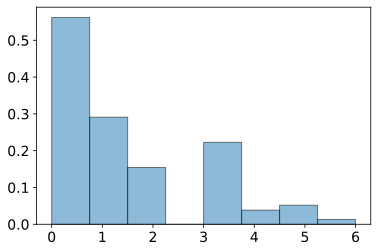

In [15]:
to_show = CDF['Helthcare_2']
helper= plt.hist(to_show, bins=8, alpha=0.5, density=True, edgecolor='black')

In [16]:
CDF['Helthcare_2'].value_counts().sort_index()

0    4214
1    2183
2    1158
3    1670
4     288
5     388
6      99
Name: Helthcare_2, dtype: int64

# 4. Предобработка данных в PipeLine<a class='anchor' id='preprocessing'>
**Этапы проекта:**
1. [Постановка задачи](#plan)
2. [Загрузка данных/фукции проекта](#load)
3. [Анализ зависимости целевой перемменной от столбцов](#first_analyze)
4. [Предобработка данных в PipeLine](#preprocessing)
5. [Визуализация и анализ зависимости данных от целевой переменной](#visual)
6. [Построение модели](#model)
7. [Финальная модель](#final_model)
8. [Сохранение результатов](#save_me)

## 4.1 Приведение типов данных 

Посмотрим, каких типов данные, их обработка будет выполняться позже.

In [17]:
CDF.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

### 4.2 Обзор номинативных переменных.

In [18]:
CDF_obj_features = CDF.select_dtypes(include='object')
CDF_obj_features.head()

Ecology_2 Ecology_3 Shops_2
0         B         B       B
1         B         B       B
2         B         B       B
3         B         B       B
4         B         B       B

In [19]:
CDF['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [20]:
CDF['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [21]:
CDF['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

Видим 3 столбца с номинативными переменными.

### 4.3 Поиск пропусков

Надём столбцы с пропусками.

In [22]:
CDF.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

### 4.4 Поиск выбросов.

Найдём выбросы для последующей настройки пайплайна. Меняем столбец и смотрим выбросы в каждом столбце.

In [23]:
CDF.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price']

In [24]:
CDF[CDF['HouseYear'] > 2022]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
8828  11607         147    2.0  44.791836   28.360393            5.0      4   
9163  10814         109    1.0  37.265070   20.239714            9.0      9   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
8828         9.0       4968   0.319809         B         B        25   
9163        12.0   20052011   0.136330         B         B        30   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
8828      4756        16        2857.0            5        8       B   
9163      6141        10         262.0            3        6       B   

              Price  
8828  243028.603096  
9163  254084.534396

Пришёл к выводу, что существуют дома, где жилая площадь больше, чем площадь дома, что невозможно, найдём все строки с таким условием.

In [25]:
CDF[CDF['KitchenSquare'] > CDF['Square']]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
2785   6569          27    1.0  38.220258   18.716856           84.0      4   
5273  13703          42    1.0  38.071692   19.723548           73.0      9   
6505  14679          81    1.0  32.276663   19.278394         1970.0      6   
9520  14656          62    1.0  47.100719   46.447960         2014.0      4   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
2785        17.0       2018   0.011654         B         B         4   
5273        10.0       2006   0.158249         B         B        21   
6505         1.0       1977   0.006076         B         B        30   
9520         1.0       2014   0.072158         B         B         2   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
2785       915         0           NaN            0        0       B   
5273      5731         0           NaN            1        0       B   
6505      5285         0         645.0            6        6       B   
9520       629         1           NaN            0        0       A   

              Price  
2785   99079.960518  
5273  160488.033165  
6505  105539.556275  
9520  108337.484207

Пришёл к выводу, что существуют дома, где площадь кухни больше, чем площадь дома, что невозможно, надйём все строки с таким условием. Такие строки считаю выбросами. Заменим жилую площадь в этих случаях на медиану.

In [26]:
CDF[CDF['Floor'] > CDF['HouseFloor']]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
17     1190           8    2.0  49.396000   28.299600            5.0      6   
19      367          45    1.0  42.367289   40.012529            1.0     16   
21     8471          20    3.0  75.611065   47.494621            8.0     11   
24     4717          27    1.0  44.203947         NaN            0.0      2   
25     4521           6    2.0  65.409965         NaN            1.0     18   
...     ...         ...    ...        ...         ...            ...    ...   
9960  16258          48    3.0  96.056784   98.152802            1.0     15   
9968   9920           1    3.0  86.487550         NaN            1.0     18   
9970  13501           6    1.0  41.310416   19.117077            9.0     18   
9975   4944           6    2.0  52.573133         NaN            1.0     18   
9996  16265          27    2.0  64.307684   37.038420            9.0     13   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
17           5.0       1962   0.458174         B         A        26   
19          14.0       2015   0.195781         B         B        23   
21           9.0       1976   0.019509         B         B        37   
24           0.0       1977   0.072158         B         B         2   
25           1.0       1977   0.243205         B         B         5   
...          ...        ...        ...       ...       ...       ...   
9960         1.0       2017   0.041125         B         B        46   
9968        17.0       1977   0.007122         B         B         1   
9970        17.0       1977   0.243205         B         B         5   
9975        17.0       1977   0.243205         B         B         5   
9996         0.0       1977   0.072158         B         B         2   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
17        4439         1        1130.0            1        5       B   
19        5212         6           NaN            3        2       B   
21        7687        11         176.0            5        5       B   
24         629         1           NaN            0        0       A   
25        1564         0         540.0            0        0       B   
...        ...       ...           ...          ...      ...     ...   
9960      9515         5           NaN            1       10       B   
9968       264         0           NaN            0        1       B   
9970      1564         0         540.0            0        0       B   
9975      1564         0         540.0            0        0       B   
9996       629         1           NaN            0        0       A   

              Price  
17    186971.926566  
19    250466.980777  
21    366916.246494  
24    135466.559958  
25    191205.272608  
...             ...  
9960  524365.550705  
9968  248248.935528  
9970  114878.830713  
9975  154366.031184  
9996  199715.148807  

[1825 rows x 20 columns]

Из данных выше можно сделать вывод, что существуют такие 1825 строк, в которых этаж квартиры превышает максимальное число этажей дома.

In [27]:
CDF[CDF['Rooms'] == 0]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
2194   3159          88    0.0   38.697117   19.345131            9.0      9   
3780   7317          27    0.0   41.790881         NaN            0.0     13   
5894    770          28    0.0   49.483501         NaN            0.0     16   
6401   9443          27    0.0   87.762616   85.125471            0.0      5   
7644   7917          27    0.0  212.932361  211.231125            0.0      2   
7929    456           6    0.0   81.491446         NaN            0.0      4   
9767  12638          27    0.0  138.427694  136.215499            0.0      4   
9869   3224          27    0.0    2.377248    0.873147            0.0      1   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
2194        16.0       1982   0.127376         B         B        43   
3780         0.0       1977   0.211401         B         B         9   
5894         0.0       2015   0.118537         B         B        30   
6401        15.0       1977   0.211401         B         B         9   
7644         3.0       2008   0.211401         B         B         9   
7929         0.0       1977   0.243205         B         B         5   
9767         3.0       2016   0.075424         B         B        11   
9869         0.0       1977   0.017647         B         B         2   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
2194      8429         3           NaN            3        9       B   
3780      1892         0           NaN            0        1       B   
5894      6207         1        1183.0            1        0       B   
6401      1892         0           NaN            0        1       B   
7644      1892         0           NaN            0        1       B   
7929      1564         0         540.0            0        0       B   
9767      3097         0           NaN            0        0       B   
9869       469         0           NaN            0        0       B   

              Price  
2194  158998.110646  
3780   98129.976788  
5894  217009.338463  
6401  219281.918007  
7644  302211.260887  
7929  212864.799112  
9767  268394.744389  
9869  126596.941798

Выше видим, что есть строки с количеством комнат равным 0, что в принципе не возможно, считаю эти строки выбросом. Заменим число комнат на медиану.

In [28]:
CDF[CDF['Rooms'] > 5]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
2004   5927          57   10.0  59.056975   36.223072           10.0     22   
2728  14865           9   10.0  60.871266   38.420681           10.0      3   
6088   8491           1   19.0  42.006046   21.779288            7.0     17   
8794  14003          99    6.0  59.414334   38.702244            6.0      7   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
2004        22.0       2002   0.090799         B         B        74   
2728         2.0       1994   0.161532         B         B        25   
6088        17.0       2014   0.007122         B         B         1   
8794         9.0       1969   0.033494         B         B        66   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
2004     19083         2           NaN            5       15       B   
2728      5648         1          30.0            2        4       B   
6088       264         0           NaN            0        1       B   
8794     10573         1        1322.0            3        8       B   

              Price  
2004  317265.323792  
2728  172329.270863  
6088   78364.616704  
8794  229661.964416

## **4.5 Пайплайн для подготовки данных:**

Словари- промежутки для разбиения в категории данные, которые поддаются категоризации.

In [29]:
dis_del = [[25], [25, 50], [75, 100], [100, 125], [125]]
sq_del = [[50], [50, 70], [70]]
lf_del = [[25], [25, 40], [40, 50], [50]]
kit_del = [[3], [3, 4.5], [4.5, 5,5], [5.5, 6,5], [6.5, 7,5], [7.5, 8,5], [8.5, 9,5], [9.5, 10,5], 
           [10.5, 11,5], [11.5]]
fl_cat = [[10], [10, 15], [15, 20], [20]]
hfl_cat = fl_cat
ec1_cat = [[0.1], [0.1, 0.2], [0.2, 0.3],[0.3, 0.4],[0.4]]
sc1_cat = [[10], [10, 20], [20, 40], [40, 55], [55]]
sc2_cat = [[2500], [2500, 8500], [8500, 12500], [12500, 13500], [13500, 15500], [15500]]
sh1_cat = [[4], [4, 6], [6, 11], [11]]
sh2_cat = [[10], [10, 15], [15, 20], [20]]
hlc1_cat = [[500], [500, 1000], [1000, 1250], [1250, 2500], [2500]]
hlc2_cat = [[0.5], [0.5, 1,5], [1.5, 2.5], [2.5, 3.5], [3.5, 4.5], [4.5, 5.5], [5.5]]

# Social_1 Social_2 Social_3 Shops_1 Shops_2 Healthcare_1 Helthcare_2

Пайплайн:

In [30]:
class PipeLine_HousePrice():
    """Пайплайн для подготовки сырых данных датасэта определения стоимости квартир"""
    
    def __init__(self):
        """Параметры класса"""
#         self.DATASET_PATH = self.DATASET_PATH
        self.health_care_med = None
        self.KitchenSquare_med = None
        self.square_med = None
        self.life_square_med = None
        self.year_med = None
        self.floor_med = None
        self.house_floor_med = None
        self.stds = None # Стандартные отклонения
        self.disps = None # Дисперсия
        self.q1 = None # 1 Квартиль
        self.q3 = None # 3 Квартиль
        self.moda = None # Мода
        
    
    def __str__(self):
        return f'Пайплайн для подготовки сырых данных датасэта определения стоимости квартир'
    
        
    
    def fiting(self, df):
        """Сохранение статистик"""
        
        # Расчет медиан
        self.health_care_med = np.median(df['Healthcare_1'].loc[df['Healthcare_1'].notna()])
        self.KitchenSquare_med = np.median(df['KitchenSquare'])
        self.square_med = np.median(df['Square'])
        self.life_square_med = np.median(df['LifeSquare'].loc[df['LifeSquare'].notna()]) 
        self.year_med = np.median(df['HouseYear'])
        self.floor_med = np.median(df['Floor'])
        self.house_floor_med = np.median(df['HouseFloor'])
    
    
    def transform(self, df):
        
        """Трансформация данных"""
        
        # 1. Работа с дата фреймом в целом
#         df = df.drop(columns='Id') #Уберём не нужный столбец Id
        

        # 2.Обработка пропусков.
        df['LifeSquare'] = df['LifeSquare'].fillna(value= self.life_square_med)
        df['Healthcare_1'] = df['Healthcare_1'].fillna(value= self.health_care_med)
    
    
        # 3. Обработка выбросов.
        
        # 3.1 Обработка выбросов года постройки
        condition_year = df['HouseYear'] > 2022
        df.loc[condition_year, 'HouseYear'] = self.year_med
        
        # 3.2 Обработка выбросов площади квартиры
        df.loc[df['Square'] < 15, 'Square'] = self.square_med 
        df.loc[(df['Square'] > 300), 'Square'] = self.square_med 
        
        # 3.3 Обработка выбросов жилой площади квартиры
        df.loc[(df['LifeSquare'] > 60), 'LifeSquare'] = self.life_square_med   
        df.loc[(df['LifeSquare'] < 18), 'LifeSquare'] = self.life_square_med  
        condition_life_sqr = df['LifeSquare'] > df['Square']
        df.loc[condition_life_sqr, 'LifeSquare'] = self.life_square_med
        
        # 3.4 Обработка выбросов этажа квартиры
        condition_floor = df['Floor'] > df['HouseFloor']
        df.loc[condition_floor, 'Floor'] = df['Floor'].median()
        condtition_floor2 = (df['Floor'] > df['HouseFloor']) & ((df['HouseFloor'] == 0) | (df['HouseFloor'] == 1))
        df.loc[condtition_floor2, 'Floor'] = 0
        df.loc[condtition_floor2, 'HouseFloor'] = 0
        df[(df['Floor'] > df['HouseFloor']) & ((df['HouseFloor'] == 0) | (df['HouseFloor'] == 1))] = self.floor_med
        df.loc[(df['Floor'] > 40), 'Floor'] = self.floor_med
        df.loc[(df['HouseFloor'] > 40), 'HouseFloor'] = self.house_floor_med

        # 3.5 Обработка выбросов площади кухни
        df.loc[(df['KitchenSquare'] > 14), 'KitchenSquare'] = self.KitchenSquare_med
        df.loc[(df['KitchenSquare'] < 5), 'KitchenSquare'] = self.KitchenSquare_med
#         df.loc[(df['KitchenSquare'] > df['Square']), 'KitchenSquare'] = self.KitchenSquare_med
        

        # 3.6 Обработка выбросов количества комнат.
        condition_room = df['Rooms'] == 0
        df.loc[condition_room, 'Rooms'] = df['Rooms'].median()
        df.loc[(df['Rooms'] > 5), 'Rooms'] = df['Rooms'].median() 

        
        # 3.7 Обработка выбросов года постройки
        df.loc[(df['HouseYear'] < 1960), 'HouseYear'] = self.year_med
        
        # 3.7 Обработка выбросов Social_
        df.loc[(df['Social_1'] >= 53), 'Social_1'] = df['Social_1'].median()
        df.loc[(df['Social_1'] <= 4), 'Social_1'] = df['Social_1'].median()
        df.loc[(df['Social_2'] >= 15000), 'Social_2'] = df['Social_2'].median()
        df.loc[(df['Social_3'] >= 93), 'Social_3'] = df['Social_3'].median() 
        
        # 3.7 Обработка выбросов Healthcare_1
        df.loc[(df['Healthcare_1'] > 3500), 'Healthcare_1'] = df['Healthcare_1'].median() 
        
        # 3.8 Обработка выбросов Shops_1
        df.loc[(df['Shops_1'] > 11), 'Shops_1'] = df['Shops_1'].median() 
        
        
        
        # 4. Новые фичи.
        df['r_square'] = df['Square']/df['Rooms'] #Средняя площадь комнаты
        df['k_square'] = df['Square']/df['KitchenSquare'] #Отношение площади к площади кухни
        df['l_square'] = df['Square']/df['LifeSquare'] #Отношение площади к жилой площади
        
        
       
        # 5. Обработка катеориальных переменных.
        
        # 5.1 Столбец Ecology_2
        pd.get_dummies(df['Ecology_2'])
        df = pd.concat([df, pd.get_dummies(df['Ecology_2'])], axis=1)
        df = df.rename(columns = {'A': 'Ec2_A', 'B': 'Ec2_B'})
        df = df.drop(columns='Ecology_2')
        
        # 5.2 Столбец Ecology_3
        pd.get_dummies(df['Ecology_3'])
        df = pd.concat([df, pd.get_dummies(df['Ecology_3'])], axis=1)
        df = df.rename(columns = {'A': 'Ec3_A', 'B': 'Ec3_B'})
        df = df.drop(columns='Ecology_3')
              
        # 5.3 Столбец Shops_2
        pd.get_dummies(df['Shops_2'])
        df = pd.concat([df, pd.get_dummies(df['Shops_2'])], axis=1)
        df = df.rename(columns = {'A': 'Sh2_A', 'B': 'Sh2_B'})
        df = df.drop(columns='Shops_2')
        
        # 6. Обработка  вещественных переменных
        df['age_binary_cat'] = 0
        df.loc[df['HouseYear'] >= 2017, 'age_binary_cat'] = 1 
        categorize(df= df, col= 'DistrictId', ncm= 'District_cat', delimetr= dis_del)
        categorize(df= df, col= 'Square', ncm= 'square_cat', delimetr= sq_del)
        categorize(df= df, col= 'LifeSquare', ncm= 'life_cat', delimetr= lf_del)
        categorize(df= df, col= 'Floor', ncm= 'fl_cat', delimetr= fl_cat)
        categorize(df= df, col= 'HouseFloor', ncm= 'hfl_cat', delimetr= hfl_cat)
        categorize(df= df, col= 'Ecology_1', ncm= 'ec1_cat', delimetr= ec1_cat)
        categorize(df= df, col= 'Social_1', ncm= 'sc1_cat', delimetr= sc1_cat)
        categorize(df= df, col= 'Social_2', ncm= 'sc1_cat', delimetr= sc2_cat)
        categorize(df= df, col= 'Shops_1', ncm= 'ec1_cat', delimetr= sh1_cat)
        categorize(df= df, col= 'Healthcare_1', ncm= 'hlc1_cat', delimetr= hlc1_cat)
        categorize(df= df, col= 'Helthcare_2', ncm= 'hlc2_cat', delimetr= hlc2_cat)
        
        # 7. Уменьшим объём памяти, котоырй занимает датафрейм
        reduce_mem_usage(df)
        
        return df
        

Пропусти датасэты через пайплайн.

In [31]:
pipe = PipeLine_HousePrice()
pipe.fiting(CDF)
CDF = pipe.transform(CDF)

Memory usage of dataframe is 2.35 MB
Memory usage after optimization is: 0.87 MB
Decreased by 63.0%


In [32]:
pipe.fiting(CDF_valid)
CDF_valid = pipe.transform(CDF_valid)

Memory usage of dataframe is 1.13 MB
Memory usage after optimization is: 0.41 MB
Decreased by 63.4%


In [33]:
CDF.head()

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
0  11809          27    3.0  115.027313   32.781261           10.0      4   
1   3013          22    1.0   39.832523   23.169222            8.0      7   
2   8215           1    3.0   78.342216   47.671970           10.0      2   
3   2352           1    1.0   40.409908   32.781261            6.0     10   
4  13866          94    2.0   64.285065   38.562515            9.0     16   

   HouseFloor  HouseYear  Ecology_1  ...  age_binary_cat  District_cat  \
0        10.0       2014   0.075424  ...               0             1   
1         8.0       1966   0.118537  ...               0             1   
2        17.0       1988   0.025609  ...               0             1   
3        22.0       1977   0.007122  ...               0             1   
4        16.0       1972   0.282798  ...               0             1   

   square_cat  life_cat  fl_cat  hfl_cat  ec1_cat  sc1_cat  hlc1_cat  hlc2_cat  
0           4         1       1        1        1        1         1         1  
1           1         1       1        1        1        1         1         1  
2           4         1       1        1        1        1         1         1  
3           1         1       1        5        1        1         1         1  
4           1         1       1        1        1        1         1         1  

[5 rows x 36 columns]

In [34]:
CDF.isna().sum()

Id                0
DistrictId        0
Rooms             0
Square            0
LifeSquare        0
KitchenSquare     0
Floor             0
HouseFloor        0
HouseYear         0
Ecology_1         0
Social_1          0
Social_2          0
Social_3          0
Healthcare_1      0
Helthcare_2       0
Shops_1           0
Price             0
r_square          0
k_square          0
l_square          0
Ec2_A             0
Ec2_B             0
Ec3_A             0
Ec3_B             0
Sh2_A             0
Sh2_B             0
age_binary_cat    0
District_cat      0
square_cat        0
life_cat          0
fl_cat            0
hfl_cat           0
ec1_cat           0
sc1_cat           0
hlc1_cat          0
hlc2_cat          0
dtype: int64

In [35]:
CDF_valid.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  4567          44    1.0  36.847630   19.094183            5.0      5   
1  5925          62    1.0  42.493908   32.925087           10.0      7   
2   960          27    2.0  59.463676   32.925087            9.0     19   
3  3848          23    3.0  49.646030   33.893826            6.0      2   
4   746          74    1.0  53.837055   32.925087            6.0      8   

   HouseFloor  HouseYear  Ecology_1  ...  age_binary_cat  District_cat  \
0         9.0       1970   0.036122  ...               0             1   
1        17.0       2017   0.072158  ...               1             1   
2        19.0       1977   0.211401  ...               0             1   
3         2.0       1965   0.014073  ...               0             1   
4        17.0       1977   0.309479  ...               0             1   

   square_cat  life_cat  fl_cat  hfl_cat  ec1_cat  sc1_cat  hlc1_cat  hlc2_cat  
0           1         1       1        1        1        1         1         1  
1           1         1       1        1        1        1         1         1  
2           1         1       1        1        1        1         1         1  
3           1         1       1        1        1        1         1         1  
4           1         1       1        1        1        1         1         1  

[5 rows x 35 columns]

In [36]:
CDF_valid.isna().sum()

Id                0
DistrictId        0
Rooms             0
Square            0
LifeSquare        0
KitchenSquare     0
Floor             0
HouseFloor        0
HouseYear         0
Ecology_1         0
Social_1          0
Social_2          0
Social_3          0
Healthcare_1      0
Helthcare_2       0
Shops_1           0
r_square          0
k_square          0
l_square          0
Ec2_A             0
Ec2_B             0
Ec3_A             0
Ec3_B             0
Sh2_A             0
Sh2_B             0
age_binary_cat    0
District_cat      0
square_cat        0
life_cat          0
fl_cat            0
hfl_cat           0
ec1_cat           0
sc1_cat           0
hlc1_cat          0
hlc2_cat          0
dtype: int64

## **4.6 Настройка пайплайна:**

Посмотрим на состояние датасэта после пайплайна.

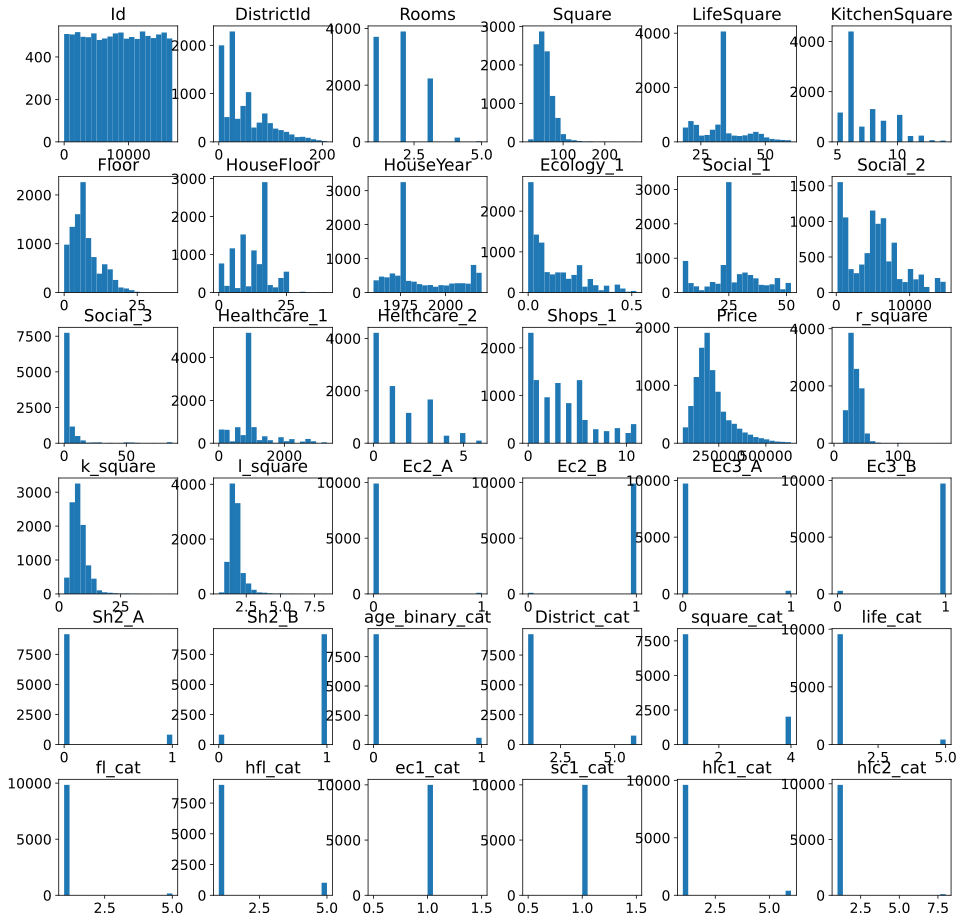

In [37]:
constitution(CDF)

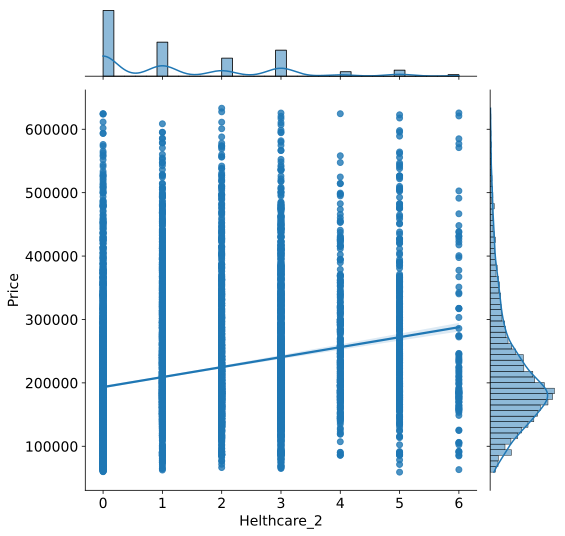

In [38]:
visualize(CDF, 'Helthcare_2')

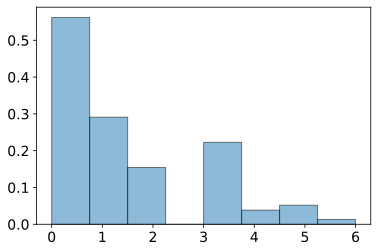

In [39]:
to_show = CDF['Helthcare_2']
helper= plt.hist(to_show, bins=8, alpha=0.5, density=True, edgecolor='black')

In [40]:
CDF['Helthcare_2'].value_counts().sort_index()

0    4214
1    2183
2    1158
3    1670
4     288
5     388
6      99
Name: Helthcare_2, dtype: int64

# 5.Визуализация данных<a class='anchor' id='visual'>

**Этапы проекта:**
1. [Постановка задачи](#plan)
2. [Загрузка данных/фукции проекта](#load)
3. [Анализ зависимости целевой перемменной от столбцов](#first_analyze)
4. [Предобработка данных в PipeLine](#preprocessing)
5. [Визуализация и анализ зависимости данных от целевой переменной](#visual)
6. [Построение модели](#model)
7. [Финальная модель](#final_model)
8. [Сохранение результатов](#save_me)

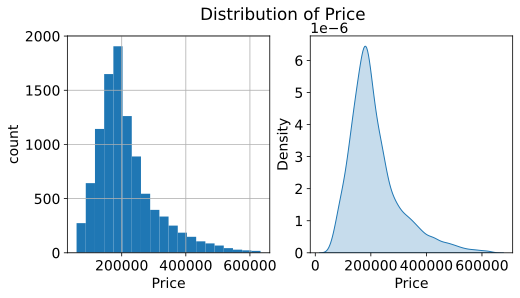

In [41]:
plt.figure(figsize = (8, 4))

plt.subplot(121)
CDF['Price'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(CDF['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Distribution of Price')
plt.show()

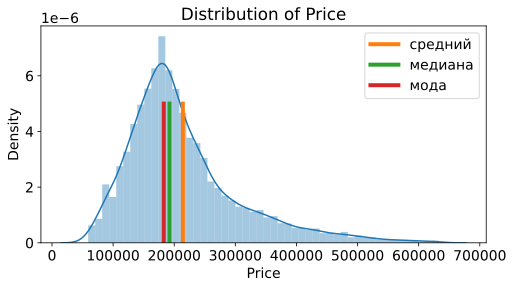

In [42]:
target_mean = round(CDF['Price'].mean(), 2)
target_median = CDF['Price'].median()
target_mode = CDF['Price'].mode()[0]

plt.figure(figsize = (8, 4))

sns.distplot(CDF['Price'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='средний',  linewidth=4)
plt.plot([target_median] * 10, y, label='медиана',  linewidth=4)
plt.plot([target_mode] * 10, y, label='мода', linewidth=4)

plt.title('Distribution of Price')
plt.legend()
plt.show()

Матрица кореляций:

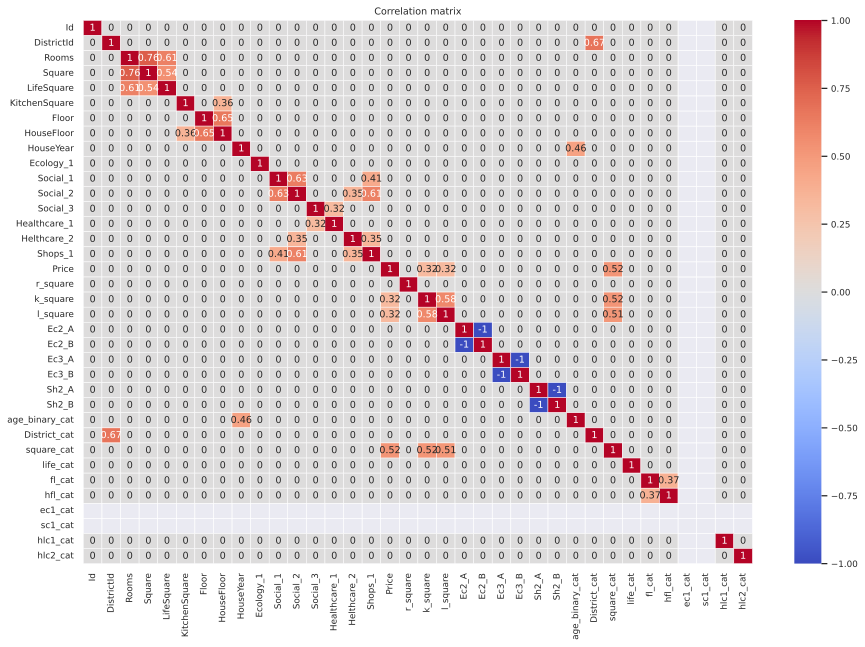

In [80]:
plt.figure(figsize = (15, 10))

sns.set(font_scale=0.8)

corr_matrix = CDF.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

# 6. Построение модели<a class='anchor' id='model'>


**Этапы проекта:**
1. [Постановка задачи](#plan)
2. [Загрузка данных/фукции проекта](#load)
3. [Анализ зависимости целевой перемменной от столбцов](#first_analyze)
4. [Предобработка данных в PipeLine](#preprocessing)
5. [Визуализация и анализ зависимости данных от целевой переменной](#visual)
6. [Построение модели](#model)
7. [Финальная модель](#final_model)
8. [Сохранение результатов](#save_me)

Отбор и разделение неоходимых столбцов.

In [44]:
columns = CDF.columns.tolist()
columns

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Price',
 'r_square',
 'k_square',
 'l_square',
 'Ec2_A',
 'Ec2_B',
 'Ec3_A',
 'Ec3_B',
 'Sh2_A',
 'Sh2_B',
 'age_binary_cat',
 'District_cat',
 'square_cat',
 'life_cat',
 'fl_cat',
 'hfl_cat',
 'ec1_cat',
 'sc1_cat',
 'hlc1_cat',
 'hlc2_cat']

In [45]:
target_col = columns.pop(16)
target_col

'Price'

In [46]:
feature_col = columns[1:]
feature_col

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'r_square',
 'k_square',
 'l_square',
 'Ec2_A',
 'Ec2_B',
 'Ec3_A',
 'Ec3_B',
 'Sh2_A',
 'Sh2_B',
 'age_binary_cat',
 'District_cat',
 'square_cat',
 'life_cat',
 'fl_cat',
 'hfl_cat',
 'ec1_cat',
 'sc1_cat',
 'hlc1_cat',
 'hlc2_cat']

## 6.1 Разделение на датасэты.

In [47]:
x = CDF[feature_col]
y = CDF[target_col]



X_valid = CDF_valid[feature_col]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle=True, random_state=42)

## 6.2 Стандартизация признаков.

In [48]:
scaler = RobustScaler()

# StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

In [49]:
col2scale = ['Rooms', 
             'Square',  'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'Ecology_1', 'Social_1',
 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1']
# col2scale = ['Ecology_1', 'Social_1',
#  'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1']

In [50]:
# X_train1[col2scale] = scaler.fit_transform(X_train1[col2scale])

# X_test1[col2scale] = scaler.fit_transform(X_test1[col2scale])
# X_train1.head()

feature_col = scaler.fit_transform(CDF[col2scale])
feature_col = scaler.fit_transform(CDF_valid[col2scale])

CDF[col2scale] = pd.DataFrame(feature_col, columns=col2scale)
CDF_valid[col2scale] = pd.DataFrame(feature_col, columns=col2scale)


In [51]:
CDF.head(4)

Id  DistrictId  Rooms    Square  LifeSquare  KitchenSquare     Floor  \
0  11809          27   -1.0 -0.660616   -2.449860      -0.333333 -0.333333   
1   3013          22   -1.0 -0.428584    0.000000       1.333333  0.000000   
2   8215           1    0.0  0.268782    0.000000       1.000000  2.000000   
3   2352           1    1.0 -0.134670    0.171592       0.000000 -0.833333   

   HouseFloor  HouseYear  Ecology_1  ...  age_binary_cat  District_cat  \
0      -0.375       2014  -0.204430  ...               0             1   
1       0.625       1966   0.000000  ...               0             1   
2       0.875       1988   0.789935  ...               0             1   
3      -1.250       1977  -0.329517  ...               0             1   

   square_cat  life_cat  fl_cat  hfl_cat  ec1_cat  sc1_cat  hlc1_cat  hlc2_cat  
0           4         1       1        1        1        1         1         1  
1           1         1       1        1        1        1         1         1  
2           4         1       1        1        1        1         1         1  
3           1         1       1        5        1        1         1         1  

[4 rows x 36 columns]

In [52]:
CDF_valid.head(4)

Id  DistrictId  Rooms    Square  LifeSquare  KitchenSquare     Floor  \
0  4567          44   -1.0 -0.660616   -2.449860      -0.333333 -0.333333   
1  5925          62   -1.0 -0.428584    0.000000       1.333333  0.000000   
2   960          27    0.0  0.268782    0.000000       1.000000  2.000000   
3  3848          23    1.0 -0.134670    0.171592       0.000000 -0.833333   

   HouseFloor  HouseYear  Ecology_1  ...  age_binary_cat  District_cat  \
0      -0.375       1970  -0.204430  ...               0             1   
1       0.625       2017   0.000000  ...               1             1   
2       0.875       1977   0.789935  ...               0             1   
3      -1.250       1965  -0.329517  ...               0             1   

   square_cat  life_cat  fl_cat  hfl_cat  ec1_cat  sc1_cat  hlc1_cat  hlc2_cat  
0           1         1       1        1        1        1         1         1  
1           1         1       1        1        1        1         1         1  
2           1         1       1        1        1        1         1         1  
3           1         1       1        1        1        1         1         1  

[4 rows x 35 columns]

## 6.3 Построение самой модели.

Сделаем предсказание на модели "обезьяне", чтобы было что с чем сравнивать.

In [53]:
gb_model_monkey = GradientBoostingRegressor(min_samples_leaf=1)

In [54]:
gb_model_monkey.fit(x_train, y_train)

y_train_preds = gb_model_monkey.predict(x_test)
# evaluate_preds(y_test, y_train_preds)

Словарь параметров модели.

In [55]:
fittings = {'loss': 'squared_error',
            "learning_rate": 0.1,
            "n_estimators": 4000,
            "subsample": 1,
            'criterion':'mse',
            'min_samples_split': 1000,
            "min_samples_leaf": 50,
            'min_weight_fraction_leaf': 0,
            "max_depth": 5,
            'min_impurity_decrease': 10,
            'init': 'zero',
            "random_state": 42,  
            'max_features': 5,
            'max_leaf_nodes': None,

           }

R2:	0.726
RMSE:	50258.249
MSE:	2525891574.888


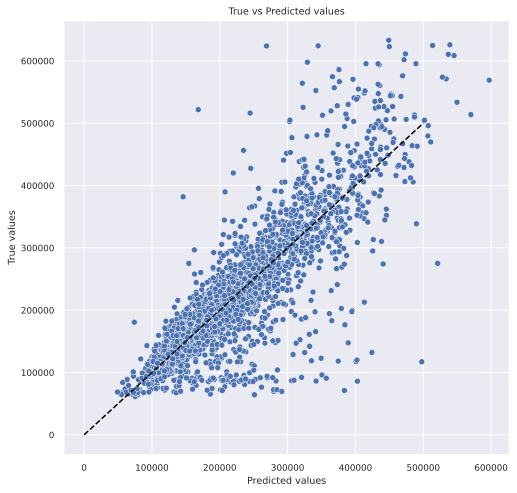

In [56]:
gb_model = GradientBoostingRegressor(loss= fittings['loss'],
            learning_rate= fittings['learning_rate'],
            n_estimators= fittings['n_estimators'],
            subsample= fittings['subsample'],
            criterion=fittings['criterion'],
            min_samples_split=fittings['min_samples_split'],
            min_samples_leaf= fittings['min_samples_leaf'],
            min_weight_fraction_leaf= fittings['min_weight_fraction_leaf'],
            max_depth= fittings['max_depth'],
            min_impurity_decrease= fittings['min_impurity_decrease'],
            init= fittings['init'],
            random_state= fittings['random_state'],  
            max_features= fittings['max_features'],
#             alpha= fittings['alpha'],
            max_leaf_nodes= fittings['max_leaf_nodes'],
#             tol= fittings['tol']
            )

gb_model.fit(x_train, y_train)

y_test_preds = gb_model.predict(x_test)
evaluate_preds(y_test, y_test_preds)

Настройка модели, для экономии времени работы закоментировано.

In [57]:
# %%time
# params = {'n_estimators':[50, 100, 200, 400], 
#           'max_depth':[3, 5, 7, 10],
#           'min_samples_leaf': [1, 2, 3, 4],
#           'learning_rate': [0.1, 0.2, 0.3, 0.4],
#           'subsample': [0.1, 0.25, 0.5, 0.75]
#          }

# gs_gb = GridSearchCV(gb_model, params, 
#                   scoring='r2', # метрика 
#                   cv=KFold(n_splits=5,   # k (кол-во разбиений/итераций) в кросс-валидации
#                            random_state=21, 
#                            shuffle=True),
#                   n_jobs=-1
#                   )
# gs_gb.fit(x_train, y_train)

In [58]:
# res = pd.DataFrame(gs_gb.cv_results_)
# res.head()

In [59]:
# gs_gb.best_score_

In [60]:
# fittings = gs_gb.best_params_
# fittings

In [61]:
# CDF.columns

In [62]:
# gb_model.fit(x_train, y_train)

# plt.barh(CDF.columns, gb_model.feature_importances_.flatten())

# plt.xlabel("Вес признака")
# plt.ylabel("Признак")

# plt.show()

## 6.4 Самые важные признаки, по мнению алгоритма.

Text(0.5, 1.0, 'Feature Importance (MDI)')

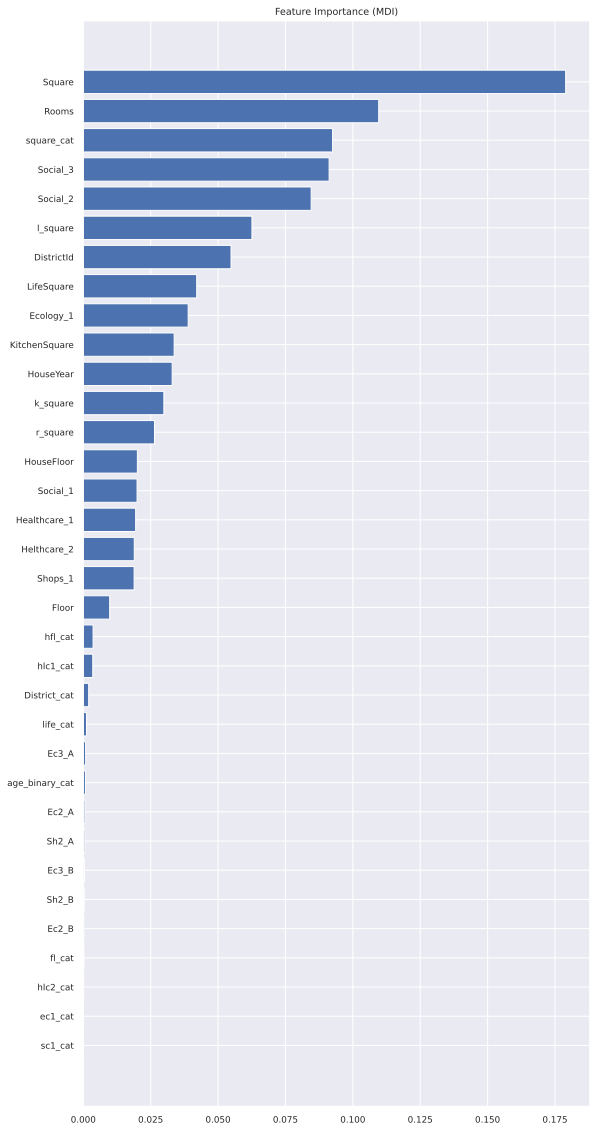

In [79]:
feature_importance = gb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(x_train.columns[sorted_idx]))
plt.title("Feature Importance (MDI)")

# 7. Финальная модель <a class='anchor' id='final_model'>
**Этапы проекта:**
1. [Постановка задачи](#plan)
2. [Загрузка данных/фукции проекта](#load)
3. [Анализ зависимости целевой перемменной от столбцов](#first_analyze)
4. [Предобработка данных в PipeLine](#preprocessing)
5. [Визуализация и анализ зависимости данных от целевой переменной](#visual)
6. [Построение модели](#model)
7. [Финальная модель](#final_model)
8. [Сохранение результатов](#save_me)

R2:	0.726
RMSE:	50258.249
MSE:	2525891574.888


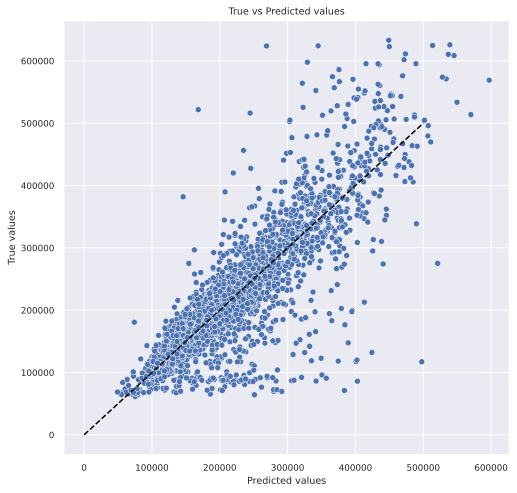

In [67]:
final_model = GradientBoostingRegressor(loss= fittings['loss'],
            learning_rate= fittings['learning_rate'],
            n_estimators= fittings['n_estimators'],
            subsample= fittings['subsample'],
            criterion=fittings['criterion'],
            min_samples_split=fittings['min_samples_split'],
            min_samples_leaf= fittings['min_samples_leaf'],
            min_weight_fraction_leaf= fittings['min_weight_fraction_leaf'],
            max_depth= fittings['max_depth'],
            min_impurity_decrease= fittings['min_impurity_decrease'],
            init= fittings['init'],
            random_state= fittings['random_state'],  
            max_features= fittings['max_features'],
#             alpha= fittings['alpha'],
            max_leaf_nodes= fittings['max_leaf_nodes'],
#             tol= fittings['tol']
            )
                                   
final_model.fit(x_train, y_train)
y_train_preds = final_model.predict(x_test)
evaluate_preds(y_test, y_train_preds)

In [69]:
y_valid_preds = final_model.predict(X_valid)

# 8. Сохранение результатов <a class='anchor' id='save_me'>
**Этапы проекта:**
1. [Постановка задачи](#plan)
2. [Загрузка данных/фукции проекта](#load)
3. [Анализ зависимости целевой перемменной от столбцов](#first_analyze)
4. [Предобработка данных в PipeLine](#preprocessing)
5. [Визуализация и анализ зависимости данных от целевой переменной](#visual)
6. [Построение модели](#model)
7. [Финальная модель](#final_model)
8. [Сохранение результатов](#save_me)

In [70]:
valid_preds = pd.DataFrame({'Id': CDF_valid['Id'], 'Price': y_valid_preds})

valid_preds.to_csv(PREDICTS_FILE_PATH, index=False, encoding='utf-8', sep=',')
valid_preds

Id          Price
0      4567  159125.311578
1      5925  113731.156484
2       960  135571.455670
3      3848   97141.026777
4       746  179167.281685
...     ...            ...
4995  10379  175532.802901
4996  16138  421540.224355
4997   3912  147973.493132
4998   5722  183450.754032
4999  11004  326389.964809

[5000 rows x 2 columns]